## Residue analysis

### todo
 1. what if mutation after semicolon does not match one before it (e.g. H207S 514.3056; H207A AGC partial-length")?
                                                                   

0       True
1       True
2       True
3       True
4       True
        ... 
6216    True
6217    True
6218    True
6219    True
6220    True
Name: construct, Length: 3954, dtype: bool

In [1]:
def parseName(mutation_str, construct_prefix):
    '''
    parseName: parse construct field in table (multiple mutations assumed)
    @input:
        mutation_str (str): construct name e.g. 'S205X 514.3585'.
        construct_prefix (str): expected construct prefix e.g. '514.'
    @return:
        construct_id (str): construct id e.g. '514.1234'
        origLetters (list of str): original aa
        positions (list of int): aa position in sequence
        newLetters (list of str): replacement aa
        num_mutations (int): number of mutations
    '''
    
    assert construct_prefix in mutation_str, 'Construct prefix ('+ construct_prefix + ') not found in entry: ' + mutation_str
    
    # if semicolon (e.g. H207S 514.3056; H207A AGC partial-length"), ignore everything after semicolon
    if ';' in mutation_str:
        mutation_str = mutation_str[:mutation_str.index(';')]
    mutation_str = mutation_str.lstrip().rstrip() # remove whitespaces
    split = mutation_str.split(" ")
    split = mutation_str.split(" ")
    construct_id = [s for s in split if '514.' in s][0]
    split.remove(construct_id)
    
    # split now only has mutations ('S99C F102Y F104Y R168P')
    # print(mutation_str)
    origLetters = [s[0] for s in split]
    newLetters = [s[-1] for s in split]
    positions = [int(s[1:-1]) for s in split]

    positions_np = np.asarray(positions)
    return (construct_id, origLetters, newLetters, positions_np, len(positions_np))
# parseName('S99C F102Y F104Y R168P 514.4455')

In [5]:
"""

"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# igabasnfr 40AP
csv_dir = r'Z:\ilya\processed\20201203_iGABAsnFR_all\good_all_40AP_omit.csv'

df = pd.read_csv(csv_dir)

# human-legible column names
VariableNames_twotailed = ['construct', 'transfect_plate', 'SNR_norm', 'SNR_pval_1', 'SNR_pval', 'SNR', 
    'df_f_norm', 'df_f_pval_1', 'df_f_pval', 'df_f', 'f0_norm', 'f0_pval_1', 'f0_pval', 'f0', 't_on_norm', 't_on_pval_1', 't_on_pval', 't_on',
    't_off_norm', 't_off_pval_1', 't_off_pval', 't_off', 'bleach_norm', 'bleach_pval_1', 'bleach_pval', 'bleach', 'n_pixels', 'n_wells',
    'texture', 'n_pixels_ctrl', 'pdi_ctrl', 'dff_ctrl', 'isbad']

df.columns = VariableNames_twotailed
print('Total # constructs: ' + str(df.shape[0]))
df.dropna(axis='index', subset = ['SNR_norm'], inplace = True)
print('Total # constructs after filtering: ' + str(df.shape[0]))

# drop rows containing STOP
df = df[np.logical_not(df['construct'].str.contains('STOP'))]

# add columns describing mutations
parsed = [parseName(c, '514.') for c in df['construct']]

df['construct_id'] = [c[0] for c in parsed]
df['orig_letter'] = [c[1] for c in parsed]
df['new_letter'] = [c[2] for c in parsed]
df['pos'] = [c[3] for c in parsed]
df['n_mutations'] = [c[4] for c in parsed]

df_singles = df[df['n_mutations'] == 1].copy()
df_singles.sample(10)

# convert position to single number and letter to single str
df_singles['pos'] = [p[0] for p in df_singles['pos']]
df_singles['orig_letter'] = [p[0] for p in df_singles['orig_letter']]
df_singles['new_letter'] = [p[0] for p in df_singles['new_letter']]


Total # constructs: 6221
Total # constructs after filtering: 3954


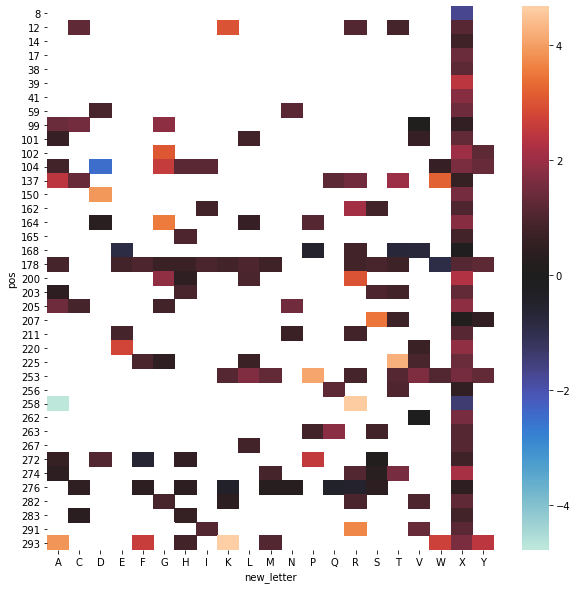

In [45]:
# pivot tables to look at individual AA contributions to sensor parameters
snr_pivot = df_singles.copy().pivot_table(values='df_f_norm', index='pos', columns='new_letter', aggfunc='mean')
snr_pivot

plt.figure(figsize=[10,10])
sns.heatmap(snr_pivot, center=0)
plt.show()

In [48]:
df_singles[df_singles['pos'] == 258]

,construct,transfect_plate,SNR_norm,SNR_pval_1,SNR_pval,SNR,df_f_norm,df_f_pval_1,df_f_pval,df_f,...,texture,n_pixels_ctrl,pdi_ctrl,dff_ctrl,isbad,construct_id,orig_letter,new_letter,pos,n_mutations
44,F258X 514.3267,20190827_iGABASnFR/P20a-20190812_iGABASnFR,0.618327,1.000000e+00,1.717638e-45,0.815471,5.423895,2.040625e-51,4.081251e-51,1.189399,...,NaN,9980,9.159660,0.219289,False,514.3267,F,X,258,1
110,"F258R 514.3200; F258R CGG partial-length""",20190827_iGABASnFR/P14a-20190812_iGABASnFR,0.779141,1.000000e+00,4.802151e-18,0.865043,4.631305,1.253407e-28,2.506814e-28,1.116318,...,NaN,4703,16.311564,0.241038,False,514.3200,F,R,258,1
300,F258X 514.3266,20190827_iGABASnFR/P19a-20190812_iGABASnFR,0.677270,1.000000e+00,1.925413e-19,0.835436,3.767099,6.838373e-28,1.367675e-27,0.872452,...,NaN,16947,12.794337,0.231598,False,514.3266,F,X,258,1
436,F258X 514.3204,20190827_iGABASnFR/P16a-20190812_iGABASnFR,0.650949,1.000000e+00,1.171159e-29,0.864885,3.392656,4.928647e-28,9.857293e-28,0.753118,...,NaN,10686,12.789029,0.221985,False,514.3204,F,X,258,1
666,F258X 514.3254,20190827_iGABASnFR/P17a-20190812_iGABASnFR,0.577244,1.000000e+00,5.392083e-47,0.912584,2.838543,1.589125e-02,3.178249e-02,0.653047,...,NaN,38502,14.932272,0.230064,False,514.3254,F,X,258,1
692,F258X 514.3259,20190827_iGABASnFR/P20a-20190812_iGABASnFR,0.639092,1.000000e+00,1.179130e-86,0.842856,2.782500,1.245381e-04,2.490761e-04,0.610171,...,NaN,9980,9.159660,0.219289,False,514.3259,F,X,258,1
2738,F258X 514.3216,20190827_iGABASnFR/P14a-20190812_iGABASnFR,0.723707,1.000000e+00,3.813138e-27,0.803498,0.685109,9.968033e-01,6.394545e-03,0.165137,...,NaN,4703,16.311564,0.241038,False,514.3216,F,X,258,1
3175,F258X 514.3257,20190827_iGABASnFR/P19a-20190812_iGABASnFR,1.626672,2.570301e-27,5.140603e-27,2.006556,0.406496,1.000000e+00,3.537997e-169,0.094144,...,NaN,16947,12.794337,0.231598,False,514.3257,F,X,258,1
3241,F258X 514.3210,20190827_iGABASnFR/P15a-20190812_iGABASnFR,0.759836,1.000000e+00,7.813325e-15,0.823134,0.320092,9.999902e-01,1.957301e-05,0.084180,...,NaN,4446,18.015088,0.262988,False,514.3210,F,X,258,1
3268,F258X 514.3234,20190827_iGABASnFR/P15a-20190812_iGABASnFR,0.806447,1.000000e+00,1.728910e-13,0.873628,0.230537,9.634743e-01,7.306331e-02,0.060628,...,NaN,4446,18.015088,0.262988,False,514.3234,F,X,258,1


In [26]:
t = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
x = t.pivot(index='foo', columns='bar', values='baz')
x

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [24]:
t

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t
